In [1]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 102k/102k [00:00<00:00, 463kB/s]

Extracting files...
Path to dataset files: /home/onyxia/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [2]:
import os

for file in os.listdir(path=path):
    print(file)

bank_transactions_data_2.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')


In [4]:
df = pd.read_csv(os.path.join(path, 'bank_transactions_data_2.csv'))
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Exploritory data analysis

In [5]:
# general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
(df.isnull().sum() | df.isna().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [7]:
## variables to work on
variables_to_work = list(df.columns[~df.columns.isin(['TransactionID', 'IP Address', 'AccountID', 'MerchantID', 'DeviceID'])].values)
df_to_work = df[variables_to_work]

In [8]:
df_to_work.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [9]:
# converting TransactionDate and PreviousTransactionDate to datetime
df_to_work[['TransactionDate', 'PreviousTransactionDate']] = df_to_work[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

/tmp/ipykernel_1925/2542327364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_work[['TransactionDate', 'PreviousTransactionDate']] = df_to_work[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)


In [10]:
df_to_work.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [11]:
# number of hours between transaction and and the previous one
df_to_work['hours_btw_trans_and_prev_trans'] = (
    (df_to_work['TransactionDate'] - df_to_work['PreviousTransactionDate'])
    .dt.total_seconds()
    .abs()
    .div(3600)
    .round(2)
)

/tmp/ipykernel_1925/382135107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_work['hours_btw_trans_and_prev_trans'] = (


In [34]:
df_to_work.columns

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'hours_btw_trans_and_prev_trans'],
      dtype='object')

In [12]:
df_to_work.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,hours_btw_trans_and_prev_trans
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,13743.65
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,11895.42
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,11581.85
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,13167.62
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,9230.25


In [ ]:
def plot_bar(df, var_name, color='#1f77b4', ax=None):
    counts = df[var_name].value_counts()
    x = counts.index.tolist()
    height_ = counts.values

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    ax.bar(x=x, height=height_, width=0.4, color=color)

    for i, value in enumerate(height_):
        ax.text(i, value + value / 100, str(value), ha='center')

    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(var_name.capitalize())
    ax.set_ylabel(f'Number of {var_name.lower()}')
    ax.set_title(f'Barplot of {var_name.capitalize()}')

def plot_hist(df, var_name, bins=10, color='#1f77b4', ax=None, transform_=None):
    y = df[var_name].dropna()

    if transform_ is not None:
        # Appliquer la transformation sur y, en convertissant en array pour la flexibilité
        y = transform_(y)

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    ax.hist(y, bins=bins, color=color, edgecolor='black')

    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(f'Histogram of {var_name.capitalize()} (transformed)')
    ax.set_xlabel('Bins')
    ax.set_ylabel(f'Frequency of {var_name.lower()}')


In [14]:
excluded_cols = ['TransactionDate', 'PreviousTransactionDate']
df_4_plot = df_to_work.drop(excluded_cols, axis=1)

In [37]:
len(df_4_plot.columns.values)

10

In [15]:
col_values = df_4_plot.columns.values

In [35]:
col_values

array(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance',
       'hours_btw_trans_and_prev_trans'], dtype=object)

Text(0.5, 1.0, 'Distribution des variables')

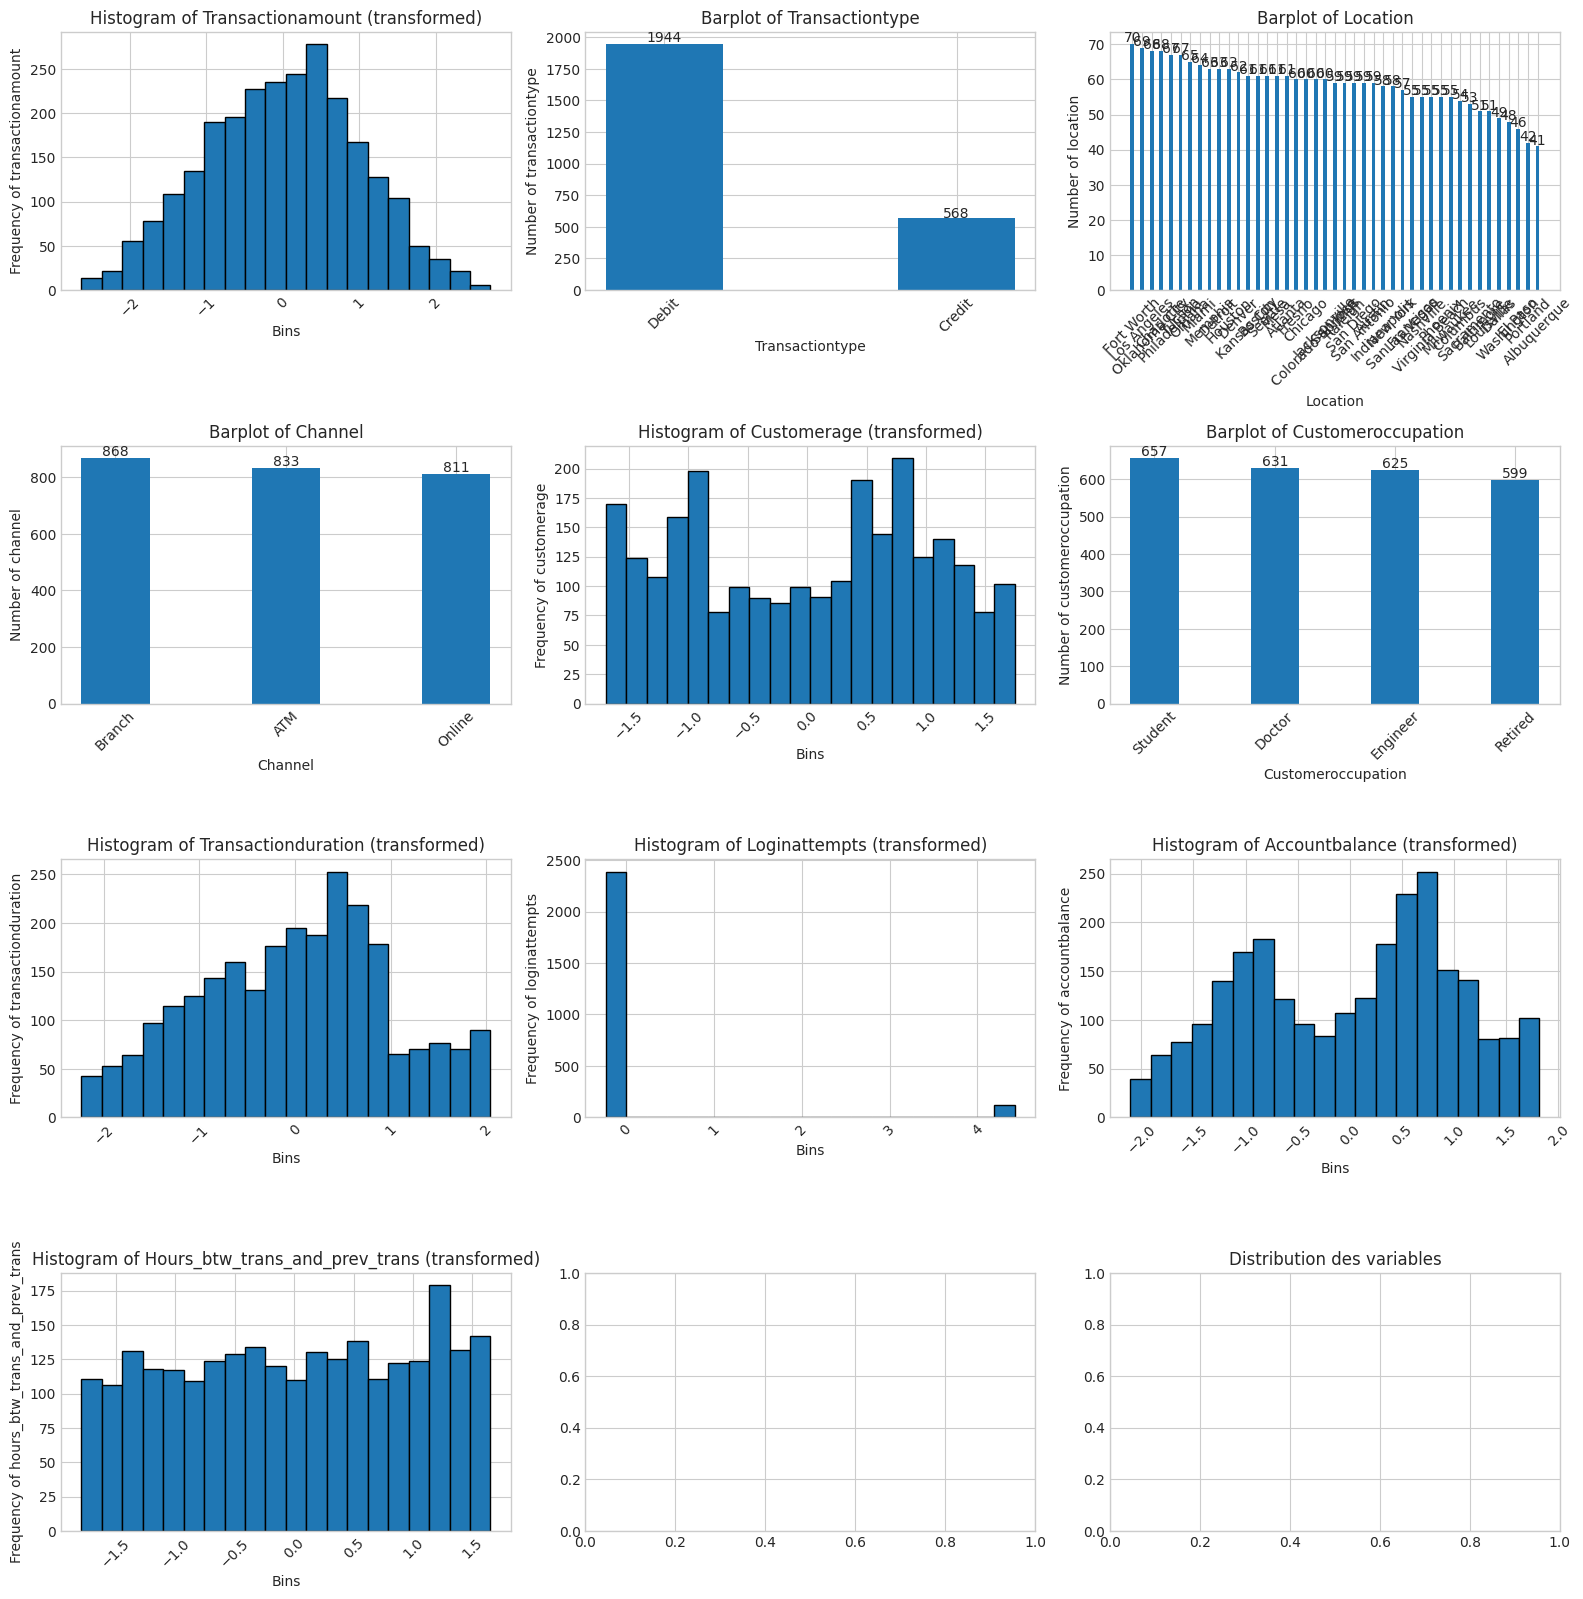

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
bins_ = 20
for i in range(len(col_values)):
    var_name = col_values[i]
    if df_4_plot[var_name].dtype in ['int64', 'float64']:
        plot_hist(df_to_work, var_name, bins=bins_, ax=axes[i])
    else:
        plot_bar(df_to_work, var_name, ax=axes[i])

plt.tight_layout()
plt.title('Distribution des variables')


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # accepte négatifs et zéros

def plot_hist(df, var_name, bins=10, color='#1f77b4', ax=None):
    data = df[var_name].dropna().values.reshape(-1, 1)
    y = pt.fit_transform(data).flatten()

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    ax.hist(y, bins=bins, color=color, edgecolor='black')

    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(f'Histogram of {var_name.capitalize()} (transformed)')
    ax.set_xlabel('Bins')
    ax.set_ylabel(f'Frequency of {var_name.lower()}')

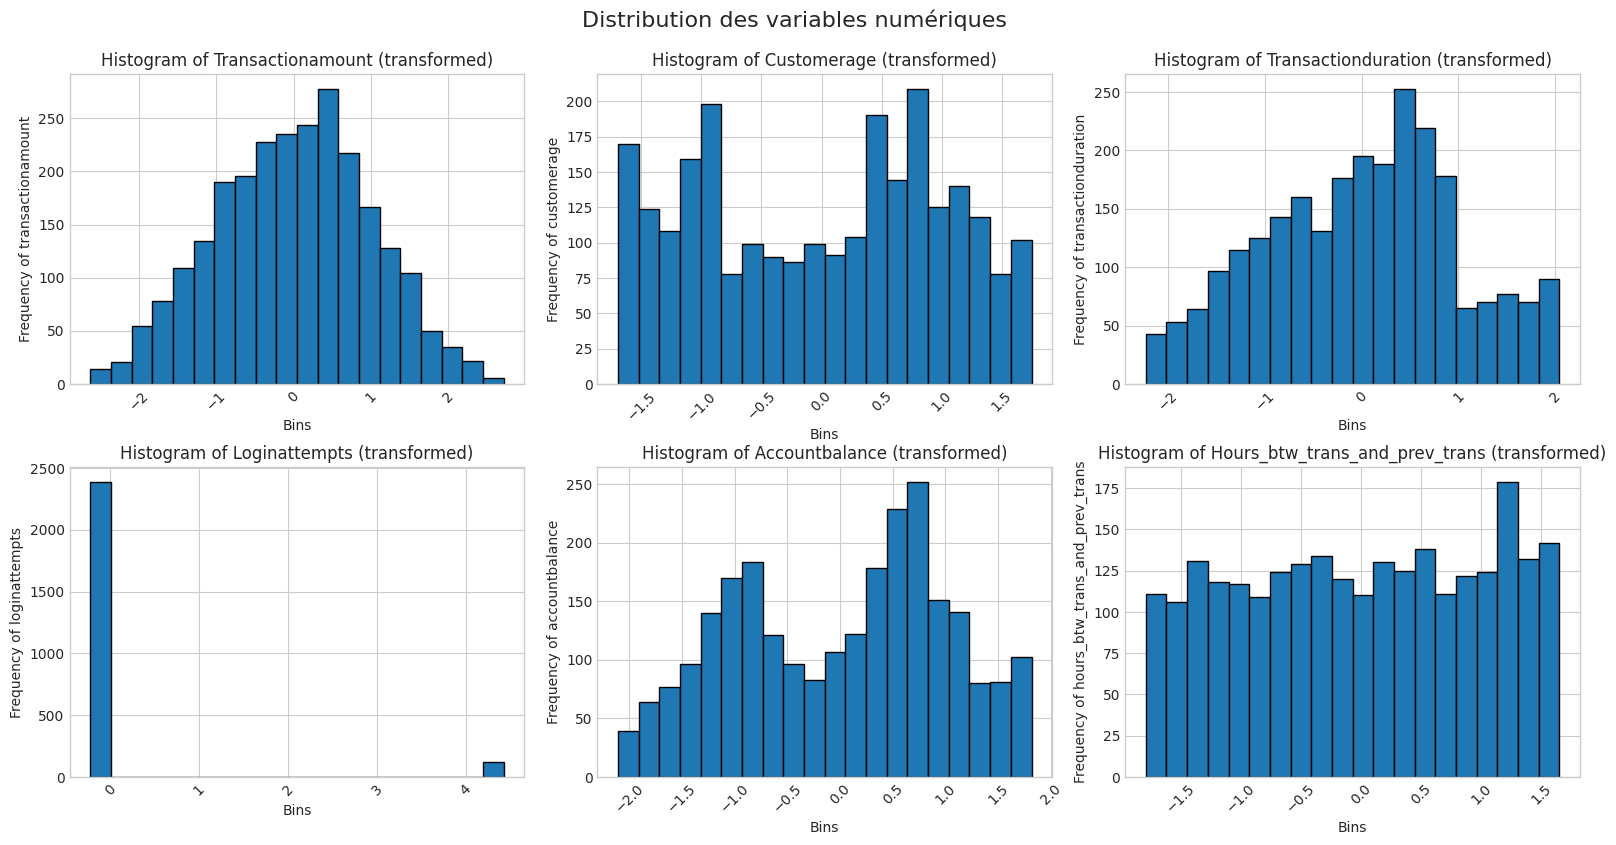

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
bins_ = 20

# On sélectionne uniquement les colonnes numériques
df_to_work_num = df_to_work.select_dtypes(include=['float64', 'int64'])
num_col_values = df_to_work_num.columns.tolist()

# On trace les histogrammes
for i in range(len(num_col_values)):
    var_name = num_col_values[i]
    plot_hist(df_to_work_num, var_name, bins=bins_, ax=axes[i])

# Cacher les axes restants s'il y en a
for j in range(len(num_col_values), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution des variables numériques', fontsize=16)
plt.subplots_adjust(top=0.94)  # pour que le titre ne chevauche pas
plt.show()


## Modele de mélange sur les données continues : GMM

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_to_work[num_col_values])
X.shape

(2512, 6)

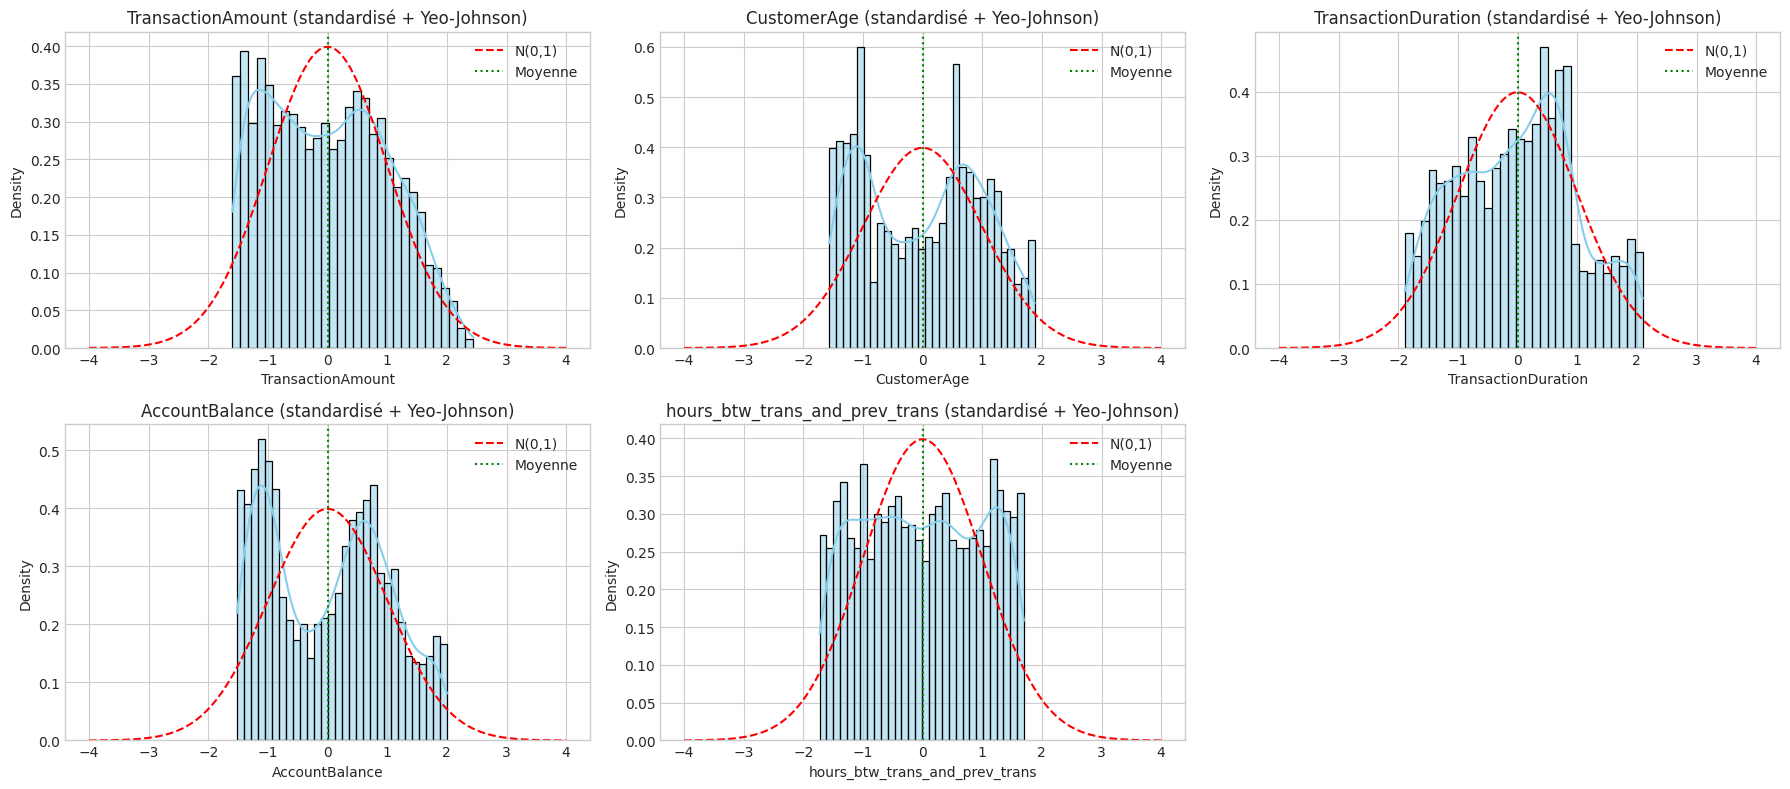

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.stats import norm
import numpy as np
import pandas as pd

# 1. Sélection des variables numériques
df_num = df_to_work.select_dtypes(include=['float64', 'int64']).dropna()
df_num.drop('LoginAttempts', axis=1, inplace=True)
# 2. Standardisation
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# 3. Transformation Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
df_num_transformed = pt.fit_transform(df_num_scaled)

# 4. Remettre dans un DataFrame avec noms de colonnes
df_num_transformed = pd.DataFrame(df_num_transformed, columns=df_num.columns)

# 5. Affichage
n_cols = 3
n_rows = int(np.ceil(len(df_num.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(df_num.columns):
    data = df_num_transformed[var]
    ax = axes[i]

    # Histogramme + KDE
    sns.histplot(data, kde=True, stat="density", bins=30, ax=ax, color='skyblue', edgecolor='black')

    # Courbe normale théorique
    x_vals = np.linspace(-4, 4, 200)
    ax.plot(x_vals, norm.pdf(x_vals, 0, 1), color='red', linestyle='--', label='N(0,1)')

    ax.axvline(0, color='green', linestyle=':', label='Moyenne')
    ax.set_title(f'{var} (standardisé + Yeo-Johnson)')
    ax.legend()

# Cacher les axes vides
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [42]:
df_to_work.shape

(2512, 12)

# Log-vraisemblance augmentée dans un GMM

Soit :

- $X = \{x_1, \ldots, x_n\}$ : les données observées,
- $Z = \{z_1, \ldots, z_n\}$ : les variables latentes (composantes d’appartenance),
- $\Theta = \{ \pi_k, \mu_k, \Sigma_k \}_{k=1}^K$ : les paramètres du modèle,
- $z_{ik} = 1$ si $x_i$ appartient à la composante $k$, sinon $0$.

---

## Vraisemblance complète

On suppose que l’observation $x_i$ vient de la composante $k$ avec une probabilité $\pi_k$, et que la distribution conditionnelle est gaussienne :

$$
p(X, Z \mid \Theta) = \prod_{i=1}^n \prod_{k=1}^K \left[ \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right]^{z_{ik}}
$$

---

## Log-vraisemblance augmentée

En prenant le logarithme, on obtient la log-vraisemblance augmentée :

$$
\log p(X, Z \mid \Theta) = \sum_{i=1}^n \sum_{k=1}^K z_{ik} \left( \log \pi_k + \log \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$

---

## Remarques

- Cette fonction est appelée "augmentée" car elle prend en compte les variables latentes $Z$, qui sont inconnues.
- L’algorithme EM maximise l’espérance de cette quantité (appelée **Q-fonction**) dans l’étape E :
  
$$
Q(\Theta \mid \Theta^{\text{old}}) = \mathbb{E}_{Z \mid X, \Theta^{\text{old}}} [ \log p(X, Z \mid \Theta) ]
$$



# Algorithme EM pour un modèle de mélange gaussien (GMM)

Soit un jeu de données $X = \{ x_1, x_2, \ldots, x_n \}$ avec $n$ observations,  
et un GMM avec $K$ composantes.

---

## Initialisation

Initialiser les paramètres du modèle pour chaque composante $k = 1, \ldots, K$ :

- Les poids : $\pi_k$, avec $\sum_{k=1}^K \pi_k = 1$ et $\pi_k > 0$,
- Les moyennes : $\mu_k \in \mathbb{R}^d$,
- Les matrices de covariance : $\Sigma_k \in \mathbb{R}^{d \times d}$.

---

## Étape 1 : Expectation (E-step)

Pour chaque observation $x_i$, calculer la responsabilité $\gamma_{ik}$ qui est la probabilité que $x_i$ appartienne à la composante $k$, donnée les paramètres actuels :

$$
\gamma_{ik} = \frac{\pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \, \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$

où $\mathcal{N}(x \mid \mu, \Sigma)$ est la densité de la loi normale multivariée.

---

## Étape 2 : Maximisation (M-step)

Mettre à jour les paramètres $\pi_k$, $\mu_k$, $\Sigma_k$ en fonction des responsabilités calculées :

- Mise à jour des poids :

$$
\pi_k = \frac{1}{n} \sum_{i=1}^n \gamma_{ik}
$$

- Mise à jour des moyennes :

$$
\mu_k = \frac{\sum_{i=1}^n \gamma_{ik} x_i}{\sum_{i=1}^n \gamma_{ik}}
$$

- Mise à jour des covariances :

$$
\Sigma_k = \frac{\sum_{i=1}^n \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^n \gamma_{ik}}
$$

---

## Répéter

Répéter les étapes **E** et **M** jusqu'à convergence, c’est-à-dire jusqu’à ce que la variation de la log-vraisemblance soit très faible ou qu’un nombre maximal d’itérations soit atteint.

---

# Résumé

| Étape          | Description                                             |
|----------------|---------------------------------------------------------|
| Initialisation | Fixer $\pi_k, \mu_k, \Sigma_k$ pour $k=1,\ldots,K$      |
| E-step         | Calculer les responsabilités $\gamma_{ik}$              |
| M-step         | Mettre à jour $\pi_k, \mu_k, \Sigma_k$                   |
| Répéter       | Jusqu’à convergence                                      |


**_Je considère comme anomalies les 5% d’observations qui ont la plus faible log-vraisemblance sous le modèle GMM_**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supposons que df_num est ton DataFrame numérique nettoyé
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)  # ou df_num_transformed si tu as appliqué PowerTransformer

# Appliquer GMM avec 1 ou plusieurs composants (clusters)
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Probabilité d'appartenance à la distribution
log_probs = gmm.score_samples(X_scaled)
print(log_probs, len(log_probs))

# responsabilités
responsabilities = gmm.predict_proba(X_scaled)
print(responsabilities)

# Détection d'anomalies : les plus faibles log-probabilités sont considérées comme anomalies
threshold = np.percentile(log_probs, 5)  # seuil pour dire "anomalie"
anomalies = log_probs < threshold

# Visualisation ou export des anomalies
df_anomalies = df_num[anomalies]
#df_anomalies

[-6.56346274 -7.31137497 -6.39426407 ... -5.57790387 -7.2208919
 -6.58841114] 2512
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [49]:
df_num.shape

(2512, 5)

In [50]:
df_num

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,hours_btw_trans_and_prev_trans
0,14.09,70,81,5112.21,13743.65
1,376.24,68,141,13758.91,11895.42
2,126.29,19,56,1122.35,11581.85
3,184.50,26,25,8569.06,13167.62
4,13.45,26,198,7429.40,9230.25
...,...,...,...,...,...
2507,856.21,33,109,12690.79,13383.03
2508,251.54,48,177,254.75,14222.58
2509,28.63,56,146,3382.91,10575.00
2510,185.97,23,19,1776.91,14847.79


- **Qu’est-ce que la KDE ?**

KDE signifie Kernel Density Estimation (en français : estimation de densité par noyau).

C’est une technique pour estimer la fonction de densité de probabilité d’une variable continue, à partir d’un échantillon de données.

- **Intuition**

Imaginons que qu'on aie une variable continue comme `TransactionAmount` et un histogramme te montre la fréquence de certaines valeurs.

L’histogramme est discret (des barres).
La KDE, elle, te donne une courbe lissée qui approxime la distribution réelle de la variable.

C’est comme si on mettait une cloche (comme une petite gaussienne) sur chaque point, et on additionne toutes ces cloches pour former une courbe.

**`Histogramme :`**

```|        ▆
|        ▆    ▆
|    ▆   ▆    ▆   ▆
|▆   ▆   ▆▆  ▆▆▆ ▆▆
+--------------------------> valeur
```

**`KDE (courbe lissée) :`**
```
          /\
         /  \     /\
        /    \   /  \
_______/      \_/    \_____
```

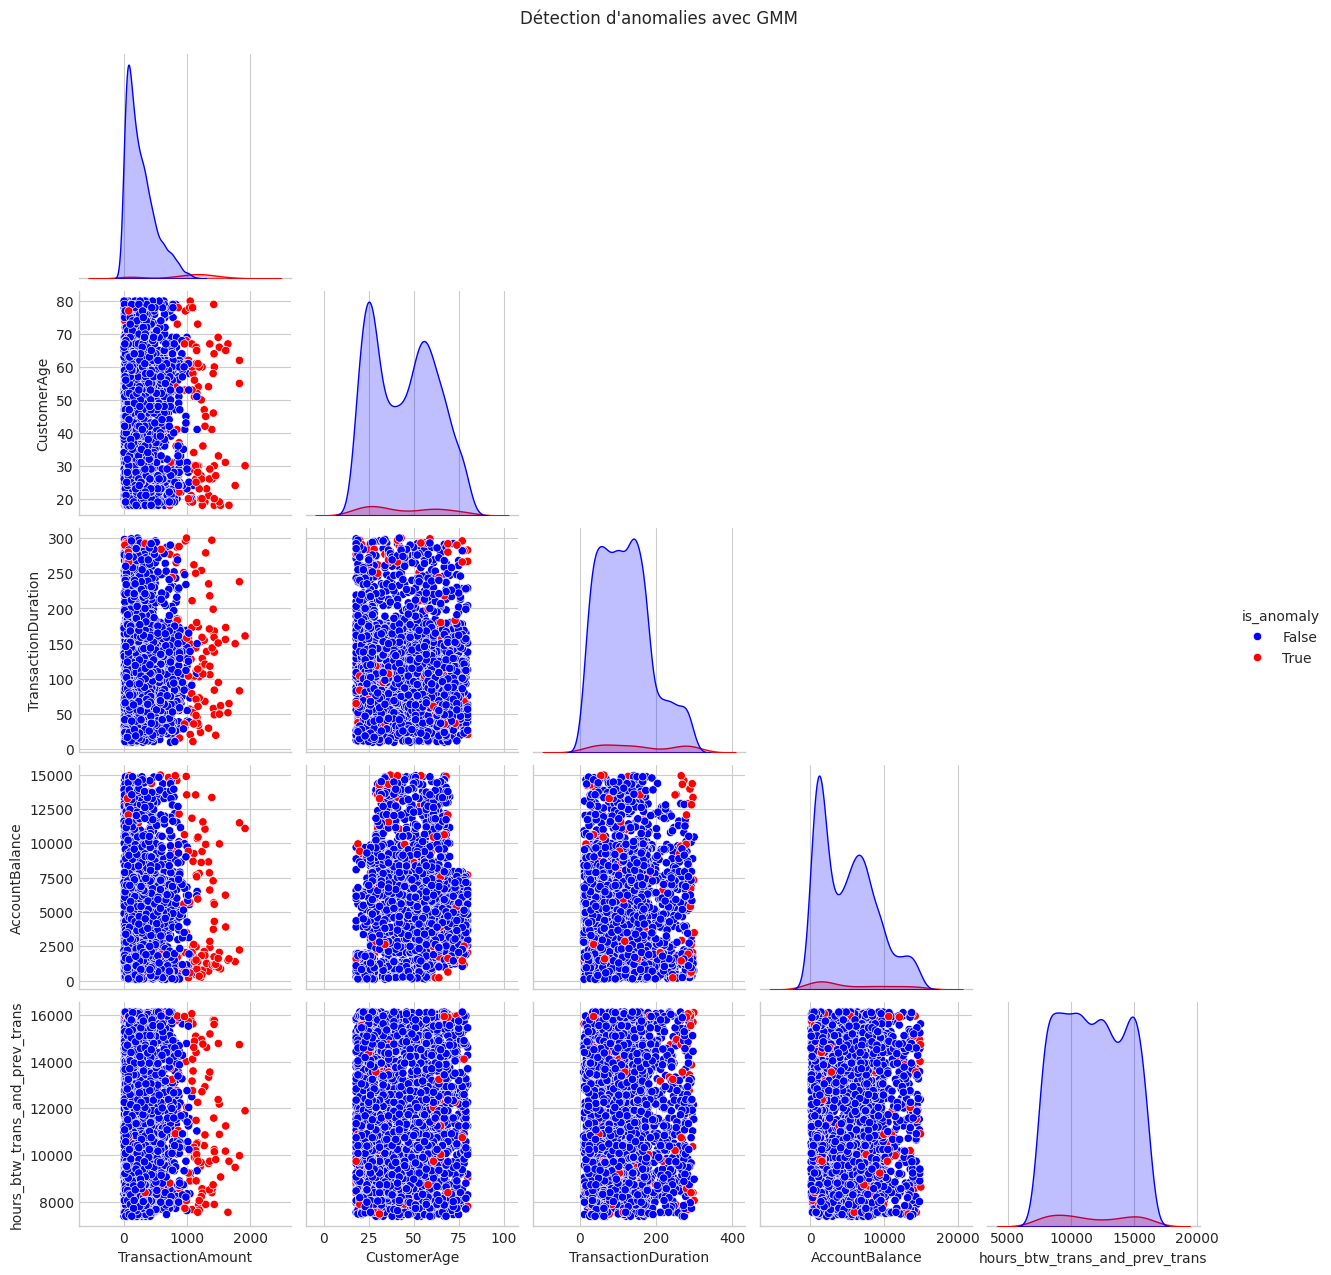

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_num_plot = df_num.copy()
df_num_plot["is_anomaly"] = anomalies  # booléen : True pour anomalie, False sinon

sns.pairplot(df_num_plot, hue="is_anomaly", palette={False: "blue", True: "red"}, corner=True) #diag_kind="hist" ou kde pour la courbe
plt.suptitle("Détection d'anomalies avec GMM", y=1.02)
plt.show()


Ce pairplot illustre comment votre modèle de mélange gaussien (GMM) identifie les observations « anormales » (en rouges) par rapport à la population « normale » (en bleu) sur quatre variables financières :

Densités marginales (diagonale)

Chaque graphique en diagonale montre la distribution estimée de la population normale (bleu semi‑transparent) et de la population anormale (rouge très fin) pour une variable donnée.

Les lignes verticales grises correspondent probablement aux moyennes ±1 ou ±2 écarts‑types de chaque composante : on voit que les anomalies (rouge) se concentrent dans les queues de la distribution, c’est‑à‑dire loin du centre de gravité des données normales.

Nuages de points bivariés (hors diagonale)

Chaque case hors diagonale juxtapose deux variables (ex. TransactionAmount vs CustomerAge). Les points rouges y apparaissent en zone de faible densité bleue : ce sont les observations dont la probabilité d’appartenance à un des clusters principaux est très faible.

Par exemple, en bas à gauche, on voit que des transactions très élevées (AccountBalance > 12 000) combinées à une longue durée (TransactionDuration > 250 s) sont souvent marquées comme anomalies.

Rôle du GMM

Le GMM modélise vos données comme la somme de plusieurs distributions normales. Il calcule pour chaque observation la probabilité de provenir de chaque composante.

Les points les plus éloignés du cœur de toutes les composantes (faible densité : zones bleues très claires) se voient attribuer un score d’« anomalie » (marqué en rouge).

Interprétation pratique

Vous pouvez utiliser ces anomalies pour déclencher des contrôles supplémentaires (fraude potentielle, erreurs de saisie, etc.).

En examinant les paires de variables où les rouges sont les plus nombreux, vous identifierez les combinaisons de facteurs les plus à risque.

En résumé, ce graphique confirme que le GMM repère bien les observations extrêmes : celles‑ci se situent dans les queues univariées (diagonales) et dans les zones à très faible densité multivariée (hors diagonale).

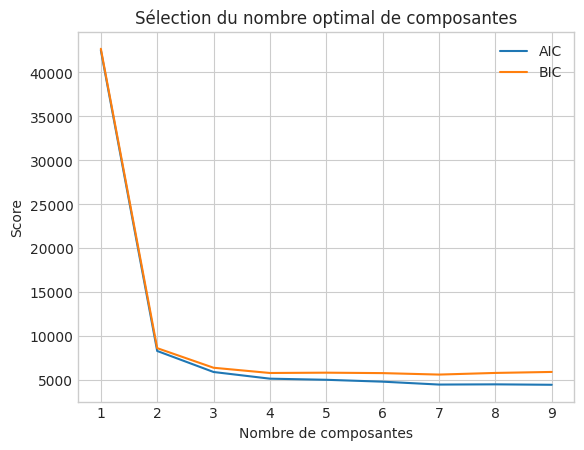

In [30]:
from sklearn.mixture import GaussianMixture

aic = []
bic = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X_scaled)
    aic.append(gmm.aic(X_scaled))
    bic.append(gmm.bic(X_scaled))

plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.legend()
plt.title('Sélection du nombre optimal de composantes')
plt.show()


In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supposons que df_num est ton DataFrame numérique nettoyé
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)  # ou df_num_transformed si tu as appliqué PowerTransformer

# Appliquer GMM avec 1 ou plusieurs composants (clusters)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Probabilité d'appartenance à la distribution
log_probs = gmm.score_samples(X_scaled)
print(log_probs, len(log_probs))
# Détection d'anomalies : les plus faibles log-probabilités sont considérées comme anomalies
threshold = np.percentile(log_probs, 5)  # seuil pour dire "anomalie"
anomalies = log_probs < threshold

# Visualisation ou export des anomalies
df_anomalies = df_num[anomalies]
df_anomalies

[-0.62038058 -1.42664216 -0.46518151 ...  0.36880941 -1.2927716
 -0.65066831] 2512


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,hours_btw_trans_and_prev_trans
23,345.84,22,142,3,1402.50,13237.69
26,246.93,23,158,5,673.35,13599.58
32,396.45,49,168,3,9690.15,9735.75
38,795.31,66,90,2,7914.88,9327.06
61,263.99,79,227,2,4175.02,12904.06
...,...,...,...,...,...,...
2423,332.06,29,221,4,11826.52,12039.46
2445,403.01,63,286,3,10513.52,10238.62
2455,655.81,55,164,2,4539.99,13167.32
2457,79.92,44,274,2,9138.76,15278.62


In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardisation
scaler = StandardScaler()
X_std = scaler.fit_transform(df_num)  # df_num = données numériques

# GMM avec 3 composantes
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_std)

# Probabilité d'appartenance à chaque composante
probas = gmm.predict_proba(X_std)

# Cluster prédit
labels = gmm.predict(X_std)

# Détection d'anomalie par seuil de log-vraisemblance
log_probs = gmm.score_samples(X_std)
anomalies = X_std[log_probs < np.percentile(log_probs, 2)]  # Les 2% les plus "bizarres"
